In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/CodeBeginner04/uidai-hackathon-26/refs/heads/main/all_states_districts_data.csv"
df = pd.read_csv(url)

df.head()


,Date,State,District,Pincode,Age_0_5,Age_5_17,Age_18_greater,_state,_district
0,1/9/2025,Bihar,Araria,854318,30,19,0,Bihar,Araria
1,1/9/2025,Bihar,Araria,854329,21,2,0,Bihar,Araria
2,1/9/2025,Bihar,Araria,854333,17,3,0,Bihar,Araria
3,1/9/2025,Bihar,Araria,854334,5,10,0,Bihar,Araria
4,1/6/2025,Bihar,Araria,854328,25,50,10,Bihar,Araria


In [3]:
# Drop the unwanted columns
df = df.drop(columns=['_state', '_district'])

# Check the first few rows to confirm
df.head()


,Date,State,District,Pincode,Age_0_5,Age_5_17,Age_18_greater
0,1/9/2025,Bihar,Araria,854318,30,19,0
1,1/9/2025,Bihar,Araria,854329,21,2,0
2,1/9/2025,Bihar,Araria,854333,17,3,0
3,1/9/2025,Bihar,Araria,854334,5,10,0
4,1/6/2025,Bihar,Araria,854328,25,50,10


In [6]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)


In [9]:
# Load only Bihar data

df = df[df['State'] == 'Bihar']

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(['Pincode', 'Date'])
df.head()

,Date,State,District,Pincode,Age_0_5,Age_5_17,Age_18_greater
24654,2025-04-01,Bihar,Patna,800001,75,265,74
24652,2025-05-01,Bihar,Patna,800001,86,277,11
24653,2025-07-01,Bihar,Patna,800001,124,527,10
23818,2025-09-01,Bihar,Patna,800001,1,10,0
23869,2025-09-04,Bihar,Patna,800001,5,10,0


In [10]:
df['total_enrolment'] = df['Age_0_5'] + df['Age_5_17'] + df['Age_18_greater']


In [11]:
Adult-to-Child Enrolment Ratio
df['adult_child_ratio'] = df['Age_18_greater'] / (df['Age_5_17'] + 1)


High ratio → more adults enrolling than children → potential migration/temporary worker patterns.

In [12]:
# Enrolment Volatility Over Time
df['enrolment_volatility'] = df.groupby('Pincode')['total_enrolment'].pct_change().abs()


# Large spikes → sudden influx or drop → migration effect.

# Low enrolment → poverty or low awareness.

In [13]:
# Age Group Shares
df['child_share'] = df['Age_0_5'] / df['total_enrolment']
df['teen_share'] = df['Age_5_17'] / df['total_enrolment']
df['adult_share'] = df['Age_18_greater'] / df['total_enrolment']



In [14]:
# Detect Irregular Enrolment Patterns (Anomalies)
from scipy.stats import zscore

df['volatility_z'] = df.groupby('District')['enrolment_volatility'].transform(
    lambda x: zscore(x, nan_policy='omit')
)

# Flag high-volatility pincodes
df['high_volatility'] = df['volatility_z'] > 2


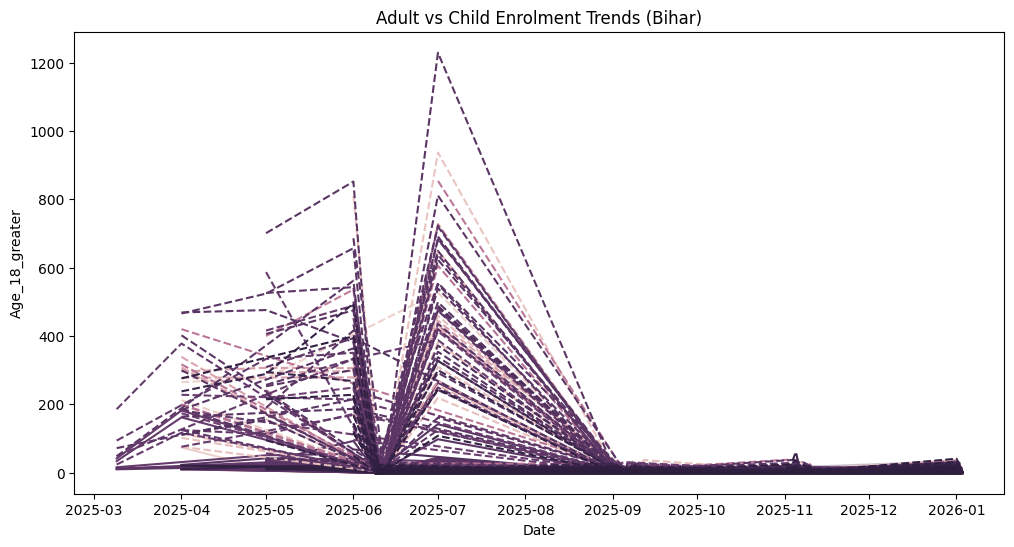

In [15]:
# Visualizations
# 🔹 Trend of Adult vs Child Enrolment
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Age_18_greater', hue='Pincode', legend=False)
sns.lineplot(data=df, x='Date', y='Age_5_17', hue='Pincode', legend=False, linestyle='--')
plt.title("Adult vs Child Enrolment Trends (Bihar)")
plt.show()

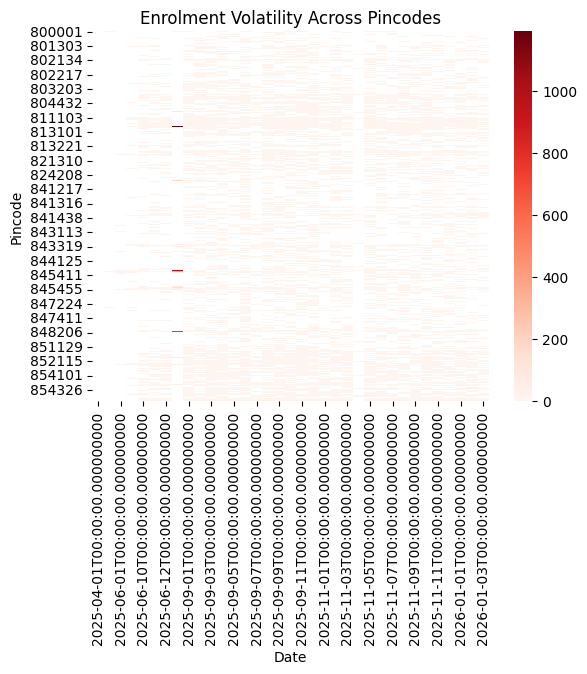

In [17]:
# Volatility Heatmap
pivot = df.pivot_table(index='Pincode', columns='Date', values='enrolment_volatility')
sns.heatmap(pivot, cmap="Reds")
plt.title("Enrolment Volatility Across Pincodes")
plt.show()

In [19]:
# Highlight High-Risk / Migration Pincodes
risk_pincodes = df[df['high_volatility'] == True]
risk_pincodes[['District', 'Pincode', 'adult_child_ratio', 'enrolment_volatility']].head(10)


# High adult_child_ratio + high volatility → likely areas with migrant inflows/outflows.

# Low total enrolment → could indicate poverty / under-enrolled areas.

,District,Pincode,adult_child_ratio,enrolment_volatility
24485,Patna,800004,0.0,10.0
23908,Patna,800007,0.0,7.0
24706,Patna,800009,0.0,7.0
24497,Patna,800011,0.0,10.0
24499,Patna,800023,0.0,12.0
24119,Patna,801103,0.0,7.0
24325,Patna,801104,0.0,14.0
24205,Patna,801105,0.0,11.0
24514,Patna,801108,0.0,7.5
23984,Patna,801108,0.0,12.0


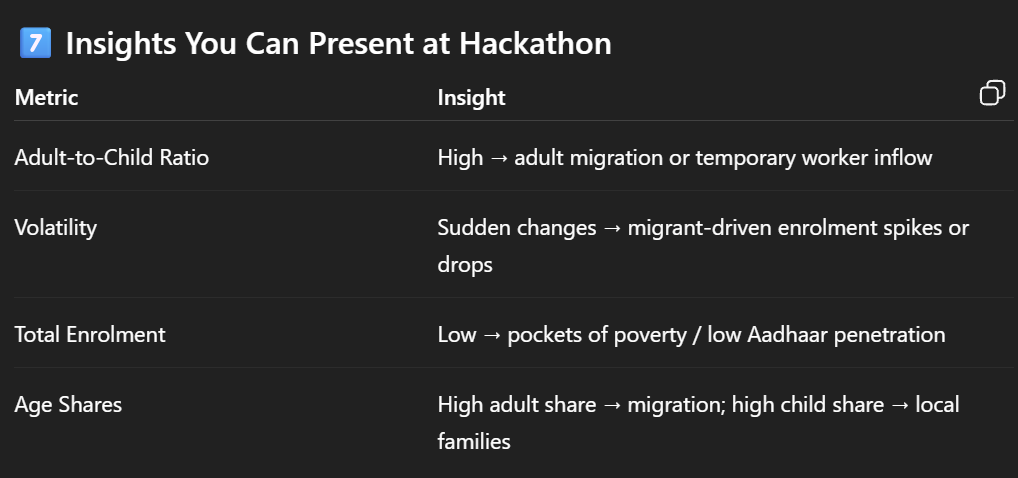